In [65]:
import pandas as pd
import numpy as np

In [66]:
data=pd.read_csv('/content/drive/MyDrive/data/diamonds.csv')

In [67]:
data.iloc[47159]

carat       0.76
cut        Ideal
color          J
clarity      SI2
depth       61.5
table       54.0
price       1833
x            5.9
y           5.93
z           3.64
Name: 47159, dtype: object

In [68]:
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [69]:
data.color.unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

<ipython-input-70-161bf5cdd641>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['price'])


<Axes: xlabel='price', ylabel='Density'>

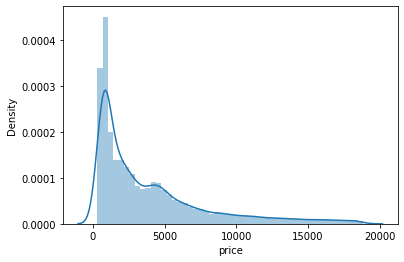

In [70]:
import seaborn as sns
sns.distplot(data['price'])

In [71]:
data.skew()

<ipython-input-71-b3b431164adb>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.skew()


carat    1.116646
depth   -0.082294
table    0.796896
price    1.618395
x        0.378676
y        2.434167
z        1.522423
dtype: float64

In [72]:
Q1=data.price.quantile(0.25)
Q2=data.price.quantile(0.75)
IQR=Q2-Q1
df=data
data=df[~((df.price<(Q1-1.5*IQR)) | (df.price>(Q2+1.5*IQR)))]

<ipython-input-73-331dd13f2f56>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['price'])


<Axes: xlabel='price', ylabel='Density'>

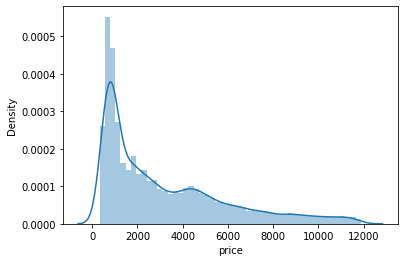

In [73]:
sns.distplot(data['price'])

In [74]:
x=data.drop('price',axis=1)
y=data.price

In [75]:
test=list(x.iloc[47159])
test

[0.7, 'Good', 'F', 'VS2', 63.8, 60.0, 5.61, 5.52, 3.55]

In [76]:
from sklearn.preprocessing import OrdinalEncoder

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.75)

In [79]:
s=(x_train.dtypes=='object')
obj_cols=list(s[s].index)

In [80]:
obj_cols

['cut', 'color', 'clarity']

In [81]:
x_train

,carat,cut,color,clarity,depth,table,x,y,z
53158,0.70,Good,G,VS1,64.3,57.0,5.59,5.64,3.61
8214,1.04,Premium,E,SI2,62.8,59.0,6.45,6.41,4.04
40009,0.41,Ideal,F,VS2,62.7,56.0,4.78,4.72,2.98
36302,0.32,Premium,H,VVS1,61.5,59.0,4.41,4.37,2.70
42073,0.55,Ideal,D,SI2,61.3,57.0,5.23,5.28,3.22
...,...,...,...,...,...,...,...,...,...
38480,0.42,Premium,F,VS1,61.8,59.0,4.81,4.83,2.98
38995,0.53,Ideal,H,SI2,61.6,56.0,5.16,5.19,3.19
16380,1.18,Ideal,I,VS1,62.6,55.3,6.73,6.79,4.24
47611,0.53,Ideal,G,VVS2,61.5,56.0,5.18,5.22,3.20


In [82]:
x_test

,carat,cut,color,clarity,depth,table,x,y,z
515,0.71,Ideal,E,SI1,60.5,56.0,5.77,5.73,3.47
40804,0.43,Ideal,H,VVS1,62.3,54.0,4.85,4.84,3.02
49657,0.70,Very Good,G,SI2,61.7,60.0,5.67,5.70,3.51
16097,1.14,Very Good,G,VS2,63.2,56.0,6.67,6.63,4.20
52448,0.59,Premium,D,VVS2,62.6,58.0,5.34,5.40,3.36
...,...,...,...,...,...,...,...,...,...
5743,0.91,Good,F,SI1,66.1,57.0,5.99,6.03,3.97
39330,0.51,Premium,G,SI1,61.4,58.0,5.17,5.14,3.16
17227,1.50,Premium,I,SI1,62.3,58.0,7.33,7.22,4.53
10078,0.32,Ideal,H,VS1,61.6,56.0,4.42,4.46,2.73


In [83]:
l_x_train=x_train.copy()
l_x_test=x_test.copy()

In [84]:
ord_en=OrdinalEncoder()

In [85]:
l_x_train[obj_cols]=ord_en.fit_transform(x_train[obj_cols])
l_x_test[obj_cols]=ord_en.transform(x_test[obj_cols])

In [86]:
l_x_train

,carat,cut,color,clarity,depth,table,x,y,z
53158,0.70,1.0,3.0,4.0,64.3,57.0,5.59,5.64,3.61
8214,1.04,3.0,1.0,3.0,62.8,59.0,6.45,6.41,4.04
40009,0.41,2.0,2.0,5.0,62.7,56.0,4.78,4.72,2.98
36302,0.32,3.0,4.0,6.0,61.5,59.0,4.41,4.37,2.70
42073,0.55,2.0,0.0,3.0,61.3,57.0,5.23,5.28,3.22
...,...,...,...,...,...,...,...,...,...
38480,0.42,3.0,2.0,4.0,61.8,59.0,4.81,4.83,2.98
38995,0.53,2.0,4.0,3.0,61.6,56.0,5.16,5.19,3.19
16380,1.18,2.0,5.0,4.0,62.6,55.3,6.73,6.79,4.24
47611,0.53,2.0,3.0,7.0,61.5,56.0,5.18,5.22,3.20


In [87]:
test=list(l_x_train.iloc[343])
test

[0.4, 2.0, 1.0, 6.0, 61.5, 56.0, 4.75, 4.78, 2.93]

In [88]:
y_train

53158    2625
8214     4370
40009    1107
36302     936
42073    1272
         ... 
38480    1031
38995    1054
16380    6541
47611    1881
41430    1227
Name: price, Length: 37800, dtype: int64

In [89]:
import xgboost as xgb

In [90]:
from xgboost import XGBRegressor

In [91]:
model=XGBRegressor()

In [92]:
model.fit(l_x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [93]:
pred=model.predict(l_x_test)

In [94]:
l_x_test

,carat,cut,color,clarity,depth,table,x,y,z
515,0.71,2.0,1.0,2.0,60.5,56.0,5.77,5.73,3.47
40804,0.43,2.0,4.0,6.0,62.3,54.0,4.85,4.84,3.02
49657,0.70,4.0,3.0,3.0,61.7,60.0,5.67,5.70,3.51
16097,1.14,4.0,3.0,5.0,63.2,56.0,6.67,6.63,4.20
52448,0.59,3.0,0.0,7.0,62.6,58.0,5.34,5.40,3.36
...,...,...,...,...,...,...,...,...,...
5743,0.91,1.0,2.0,2.0,66.1,57.0,5.99,6.03,3.97
39330,0.51,3.0,3.0,2.0,61.4,58.0,5.17,5.14,3.16
17227,1.50,3.0,5.0,2.0,62.3,58.0,7.33,7.22,4.53
10078,0.32,2.0,4.0,4.0,61.6,56.0,4.42,4.46,2.73


In [95]:
pred

array([2798.2703, 1082.1714, 1981.7045, ..., 8121.941 ,  618.0505,
       2955.9963], dtype=float32)

In [96]:
y_test

515      2823
40804    1169
49657    2141
16097    6435
52448    2515
         ... 
5743     3893
39330    1071
17227    6888
10078     592
53421    2671
Name: price, Length: 12600, dtype: int64

In [100]:
model.score(l_x_test,y_test)

0.9805196232727044